In [18]:
import pandas as pd

orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
products = pd.read_csv('../data/raw/olist_products_dataset.csv')
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')

In [19]:
orders.isnull().sum()
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)

In [20]:
df = items.merge(orders, on='order_id') \
          .merge(products, on='product_id') \
          .merge(customers, on='customer_id')

In [21]:
df['revenue'] = df['price'] * df['freight_value']
total_revenue = df['revenue'].sum()

In [22]:
top_products = df.groupby('product_category_name') \
                 .agg({'revenue':'sum'}) \
                 .sort_values(by='revenue', ascending=False)

In [23]:
df['month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = df.groupby('month')['revenue'].sum()    

Matplotlib is building the font cache; this may take a moment.


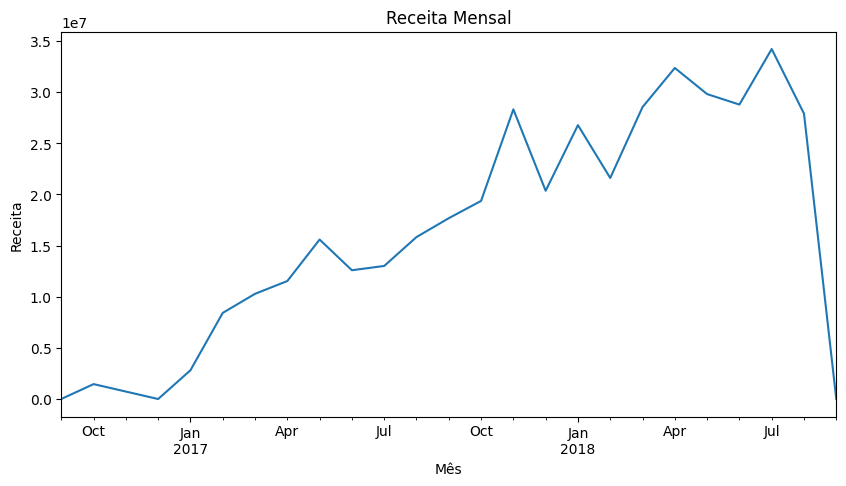

In [24]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,5))
plt.title('Receita Mensal')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.show()